<a href="https://colab.research.google.com/github/Ninadrmore1999/ML-projects-/blob/main/Blinkit_delivery_partners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Business Case**

**Blinkit** is trying to find an **optimal number of delivery partners per store** for faster delivery

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2


Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 34.0MB/s]


In [ ]:
df=pd.read_csv('multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


Now lets see the count of sample each of the three classes

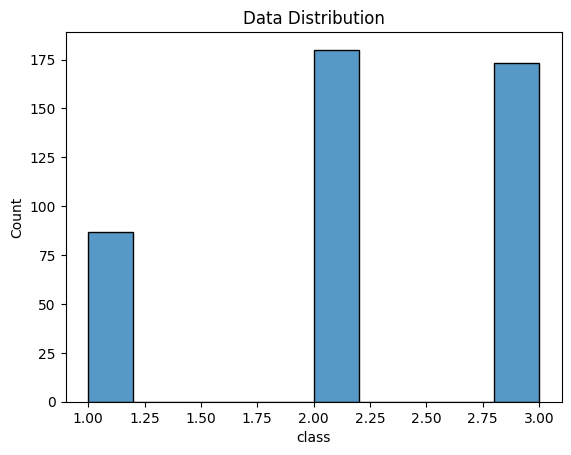

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x="class")
plt.title('Data Distribution')
plt.show()

**quiz**

Lets now define our X and y for the model and visualize the data

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'	]].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


def scatter_visualize(visualize1,visualize2,y_label):
  scatter = plt.scatter(visualize[:,0] ,visualize[:,1],c = y.values[:,0] )
  plt.legend(handles=scatter.legend_elements()[0], labels=['Class1','Class2','Class3'])
  plt.show()

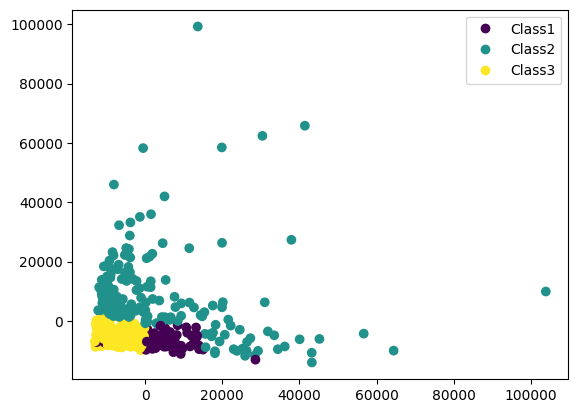

In [ ]:
# reducing features to just 2 features for visualization purpose
pca = PCA(n_components=2)
visualize = pca.fit_transform(X)


scatter_visualize(visualize[:,0] ,visualize[:,1],y.values[:,0])



**observe**

Data is not only **multi classed imbalanced** data
- It is also **Non-Linear in nature**



# **Geometric Intuition of kNN**

# **kNN Scratch Code**

lets split the data into train, validation and test set

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val,test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 7) (247, 1)
(83, 7) (83, 1)
(110, 7) (110, 1)


SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [ ]:
y_sm.value_counts()

class
1        99
2        99
3        99
dtype: int64

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler

st =  StandardScaler()

X_sm = st.fit_transform(X_sm.values)
X_val_scaled = st.transform(X_val.values)
X_test_scaled = st.transform(X_test.values)ru

y_sm = y_sm.values[:,0]
y_val = y_val.values[:,0]
y_test = y_test.values[:,0]

kNN Implementation from Scratch
 with k = 5

taking the 50th Val data as our $x_q$

In [ ]:
X_val_scaled[50]

array([ 0.73607101, -0.60813714, -0.46207814, -0.65274768, -0.32663492,
       -0.5085816 , -0.28410302])

finding distance

In [ ]:
dist = np.sqrt(np.sum((X_val_scaled[50]-X_sm)**2,axis=1) )

print(dist.shape)

(297,)


In [ ]:
# Storing distance and Class labels together
distances = [(dist[i],y_sm[i]) for i in range(len(dist)) ]

# sort the distances
distances = sorted(distances)

In [ ]:
# Nearest/First K points
distances = distances[:5]

In [ ]:
distances = np.array(distances)

classes_counts = np.unique(distances[:,1],return_counts=True)

index = classes_counts[1].argmax()
pred = classes_counts[0][index]

print('kNN prediction:',pred)

kNN prediction: 3.0


In [ ]:
print('Neighbors[(distance),(Label)]:',distances)

Neighbors[(distance),(Label)]: [[0.20233917 3.        ]
 [0.21347364 3.        ]
 [0.22790479 3.        ]
 [0.28152306 3.        ]
 [0.30105843 3.        ]]


Formulating into one function

In [ ]:
def knn(X,Y,queryPoint,k):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances)
    # Nearest/First K points
    distances = distances[:k]

    distances = np.array(distances)

    classes_counts = np.unique(distances[:,1],return_counts=True)

    index = classes_counts[1].argmax()
    pred = classes_counts[0][index]

    return int(pred),distances

Predicted class label for $x_q$

In [ ]:
pred,neighbors = knn(X_sm, y_sm, X_val_scaled[50],5)

print(f'k nearest neighbors with the distance and class label :{neighbors}')

print(f'The predicted class label: {pred}')

k nearest neighbors with the distance and class label :[[0.20233917 3.        ]
 [0.21347364 3.        ]
 [0.22790479 3.        ]
 [0.28152306 3.        ]
 [0.30105843 3.        ]]
The predicted class label: 3


**Observe**

All the 5 datapoints which are closest to the $x^q$ have:
- The same class labels = 3

Hence due to majority vote:
- $x^q$ → Class3

<br>

Lets see what is the actual class label for $x^q$

In [ ]:
y_val[50]

3

This means that kNN correctly predicted $x^q$



In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = []

for i in range(X_test_scaled.shape[0]):
    output,_ = knn(X_sm, y_sm, X_test_scaled[i],5)
    y_pred.append(output)




cm = confusion_matrix(y_test,y_pred)


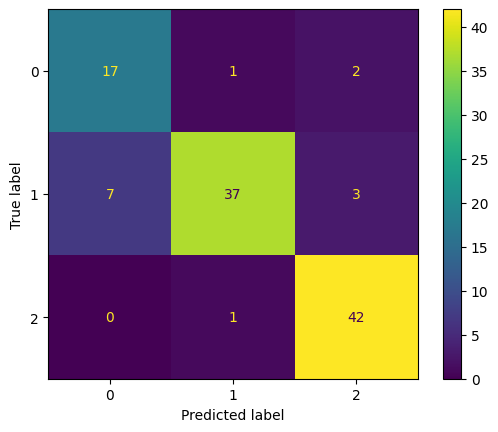

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(cm).plot()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           1       0.85      0.71      0.77        24
           2       0.79      0.95      0.86        39
           3       0.98      0.89      0.93        47

    accuracy                           0.87       110
   macro avg       0.87      0.85      0.86       110
weighted avg       0.88      0.87      0.87       110



**observe**

Clearly the kNN model performed quite well on the data, showing :
- kNN can handle Multi-Class problem
- kNN can handle Non-linearity in the data



# Sklearn's [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) implementation

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

Fit method stores the training datapoints in the kNN model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

knn.fit(X_sm, y_sm)


KNeighborsClassifier(metric='euclidean')

Accuracy of KNN on Test data

In [ ]:
knn.score(X_val_scaled, y_val)

0.8674698795180723

Precision, Recall, F1-Score of KNN on test data

In [ ]:
from sklearn.metrics import classification_report

y_pred = knn.predict(X_val_scaled)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           1       0.63      0.86      0.73        14
           2       0.97      0.84      0.90        38
           3       0.90      0.90      0.90        31

    accuracy                           0.87        83
   macro avg       0.83      0.87      0.84        83
weighted avg       0.89      0.87      0.87        83



Confusion Matrix of KNN on Test Data

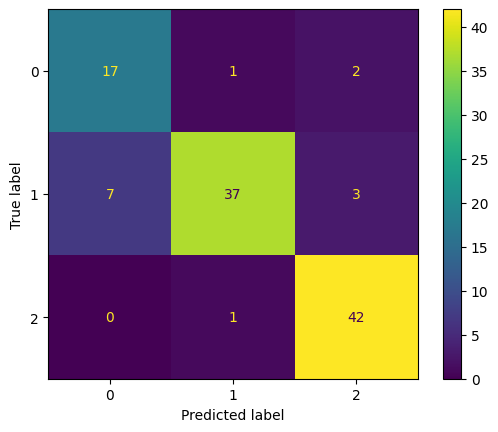

In [ ]:
y_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(cm).plot()

**observe**

The model makes wrong prediction mostly on **Class 1**


#### How to perform hyperparameter tuning to make kNN fit better ?
Ans: for this lets first understand Bias-Variance of kNN

# **Bias-Variance Trade Off in kNN**

**observe**

1. training accuracy of kNN decreases as k increases
2. Validation accuracy of kNN first increases as k increases , then decreases

Hence we can say:
- when k → very small,
 - since **gap between training and validation accuracy is high**
 - kNN is being a very complex model, and hence it overfits

- when k → very large,
 - though the gap between training and validation accuracy is low, but **training accuracy is worse**
 - kNN is being a very simple model, and hence it underfits

Hyperparameter tuning of kNN

In [ ]:
Acc = []

# Calculating error for K values between 1 and 50
# Note: 51 is not included in the loop
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(X_sm, y_sm)

    Acc.append(knn.score(X_val_scaled,y_val))

Visualizing the error and K values

Text(0, 0.5, 'Accuracy')

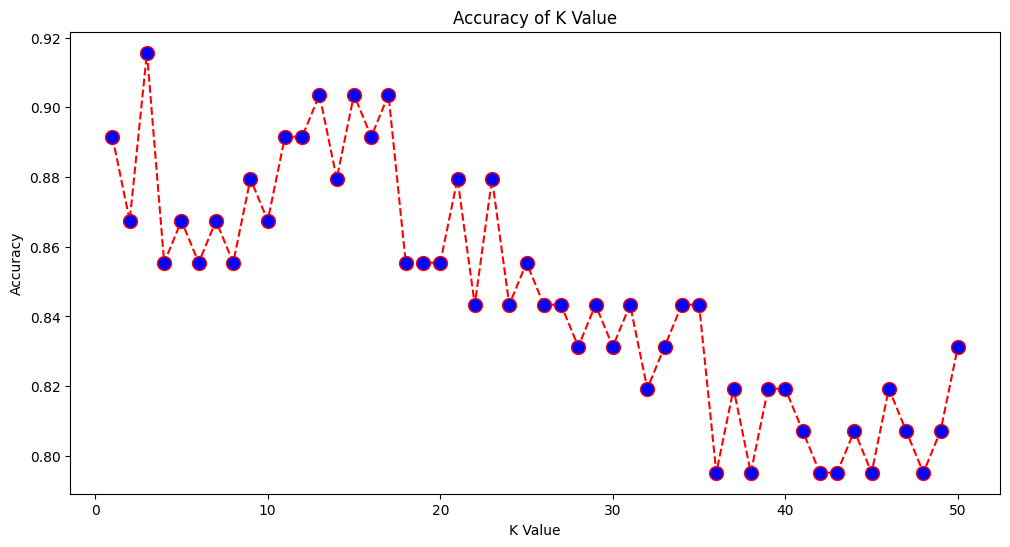

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), Acc, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy of K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')

**observe**

From this accuracy plot, it is clear that:
- Highest accuracy attained when $k = 5$

- Meaning our intial kNN is the best model

Decision Boundary plot

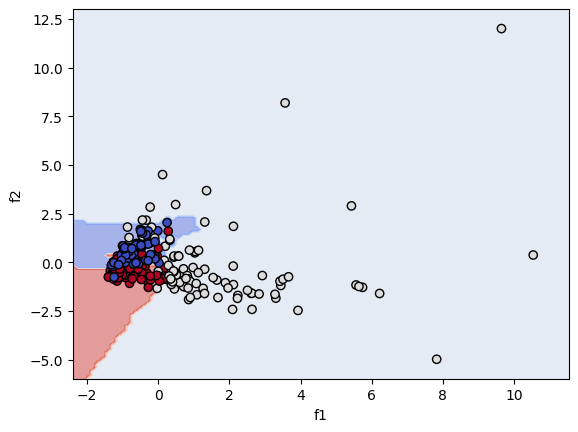

In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.neighbors import KNeighborsClassifier

# Choosing the first 2 columns for the plot


pca = PCA(n_components=2)
X_train_cols = pca.fit_transform(X_sm)

# Creating and fitting the tree classifier

classifier = KNeighborsClassifier(n_neighbors=5,metric='euclidean')

classifier.fit(X_train_cols, y_sm)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier,
                                              X_train_cols,
                                              response_method="predict",
                                              xlabel='f1', ylabel='f2',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(X_train_cols[:, 0], X_train_cols[:, 1],
                 c=y_sm, edgecolor="k",
                 cmap=plt.cm.coolwarm)


plt.show()

**observe**

We can clearly see:
- kNN creates a non-linear decision Boundary

1. **Class1** and its decision boundary → shown in **red**
2. **Class2** and its decision boundary → shown in **sky Blue**
3. **Class3** and its decision boundary → shown in **Blue**